In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Livadia'
raceDate = '2/4/2023'
surface = 'Gravel'
competition = 'cup'

link = 'https://www.ewrc-results.com/results/83545-rally-sprint-livadias-2023/?s='
startat, no_ss=418510, int(3)
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in range(0,(no_ss)):
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(my_url11)
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#3,Tsouloftas Ale,C1,9:28.07,-,75.9,1,Livadia,2/4/2023,Gravel,cup,1
1,2,#2,Panteli Petros,C1,9:59.66,+31.59 + 31.59,71.9 2.64,1,Livadia,2/4/2023,Gravel,cup,2
2,3,#4,Paradissis P.,C2,10:24.29,+56.22 + 24.63,69.0 4.70,1,Livadia,2/4/2023,Gravel,cup,3
3,4,#11,Panteli Chryso,C5 F2,10:43.31,+1:15.24 + 19.02,67.0 6.29,1,Livadia,2/4/2023,Gravel,cup,4
4,5,#9,Tsakalos Theod,C5 F2,10:54.93,+1:26.86 + 11.62,65.8 7.26,1,Livadia,2/4/2023,Gravel,cup,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,33,#36,Pavli Marialen,C6 F2,12:26.85,+3:02.63 + 0.03,57.7 15.3,3,Livadia,2/4/2023,Gravel,cup,33
33,34,#112,Kofinas Konsta,4 1600,12:30.08,+3:05.86 + 3.23,57.4 15.5,3,Livadia,2/4/2023,Gravel,cup,34
34,35,#114,Dodos Giorgos,4 1600,12:38.71,+3:14.49 + 8.63,56.8 16.3,3,Livadia,2/4/2023,Gravel,cup,35
35,36,#111,Vassilopoulos,2 2000,12:40.12,+3:15.90 + 1.41,56.7 16.4,3,Livadia,2/4/2023,Gravel,cup,36


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [7]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [8]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.jpg'))


In [9]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Tsouloftas Ale,C1,1,Livadia,2/4/2023,Gravel,cup,1,568.07
1,Panteli Petros,C1,1,Livadia,2/4/2023,Gravel,cup,2,599.66
2,Paradissis P.,C2,1,Livadia,2/4/2023,Gravel,cup,3,624.29
3,Panteli Chryso,C5 F2,1,Livadia,2/4/2023,Gravel,cup,4,643.31
4,Tsakalos Theod,C5 F2,1,Livadia,2/4/2023,Gravel,cup,5,654.93
...,...,...,...,...,...,...,...,...,...
32,Pavli Marialen,C6 F2,3,Livadia,2/4/2023,Gravel,cup,33,746.85
33,Kofinas Konsta,4 1600,3,Livadia,2/4/2023,Gravel,cup,34,750.08
34,Dodos Giorgos,4 1600,3,Livadia,2/4/2023,Gravel,cup,35,758.71
35,Vassilopoulos,2 2000,3,Livadia,2/4/2023,Gravel,cup,36,760.12


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race    ss          
Livadia 1     568.07
        2     559.87
        3     564.22

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Tsouloftas Ale,C1,1,Livadia,2/4/2023,Gravel,cup,1,568.07,568.07,0.00,0.000000,01
1,Panteli Petros,C1,1,Livadia,2/4/2023,Gravel,cup,2,599.66,568.07,31.59,5.560934,01
2,Paradissis P.,C2,1,Livadia,2/4/2023,Gravel,cup,3,624.29,568.07,56.22,9.896668,01
3,Panteli Chryso,C5 F2,1,Livadia,2/4/2023,Gravel,cup,4,643.31,568.07,75.24,13.244847,01
4,Tsakalos Theod,C5 F2,1,Livadia,2/4/2023,Gravel,cup,5,654.93,568.07,86.86,15.290369,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,Pavli Marialen,C6 F2,3,Livadia,2/4/2023,Gravel,cup,33,746.85,564.22,182.63,32.368580,03
127,Kofinas Konsta,4 1600,3,Livadia,2/4/2023,Gravel,cup,34,750.08,564.22,185.86,32.941051,03
128,Dodos Giorgos,4 1600,3,Livadia,2/4/2023,Gravel,cup,35,758.71,564.22,194.49,34.470597,03
129,Vassilopoulos,2 2000,3,Livadia,2/4/2023,Gravel,cup,36,760.12,564.22,195.90,34.720499,03


In [12]:
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Tsouloftas Ale,C1,1,Livadia,2/4/2023,Gravel,cup,1,568.07,568.07,0.00,0.000000,01
1,Panteli Petros,C1,1,Livadia,2/4/2023,Gravel,cup,2,599.66,568.07,31.59,5.560934,01
2,Paradissis P.,C2,1,Livadia,2/4/2023,Gravel,cup,3,624.29,568.07,56.22,9.896668,01
5,Davaris Nikos,C2,1,Livadia,2/4/2023,Gravel,cup,6,668.30,568.07,100.23,17.643952,01
7,Christodoulou,C2,1,Livadia,2/4/2023,Gravel,cup,8,677.38,568.07,109.31,19.242347,01
15,Xanthakos M.,C2,1,Livadia,2/4/2023,Gravel,cup,16,707.60,568.07,139.53,24.562114,01
48,Ismailos Panos,C2,1,Livadia,2/4/2023,Gravel,cup,49,1020.77,568.07,452.70,79.690883,01
49,Tsouloftas Ale,C1,2,Livadia,2/4/2023,Gravel,cup,1,559.87,559.87,0.00,0.000000,02
50,Panteli Petros,C1,2,Livadia,2/4/2023,Gravel,cup,2,586.60,559.87,26.73,4.774323,02
51,Paradissis P.,C2,2,Livadia,2/4/2023,Gravel,cup,3,610.07,559.87,50.20,8.966367,02


In [30]:
ss_times_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race           Livadia               
SS.                 01      02     03
Crew                                 
Christodoulou   109.31   87.61  78.51
Davaris Nikos   100.23   96.54  90.45
Ismailos Panos  452.70   55.93  46.98
Panteli Petros   31.59   26.73  26.21
Paradissis P.    56.22   50.20  41.32
Tsouloftas Ale    0.00    0.00   0.00
Xanthakos M.    139.53  283.47    NaN

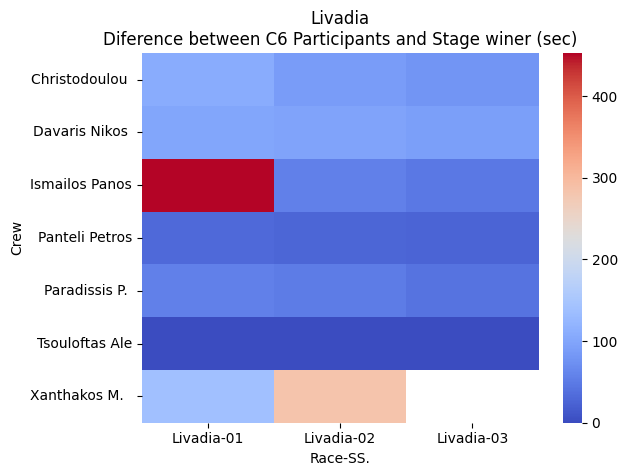

In [31]:
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between C6 Participants and Stage winer (sec)')
plt.savefig((rallyname) + "Heatmap_C1.png")

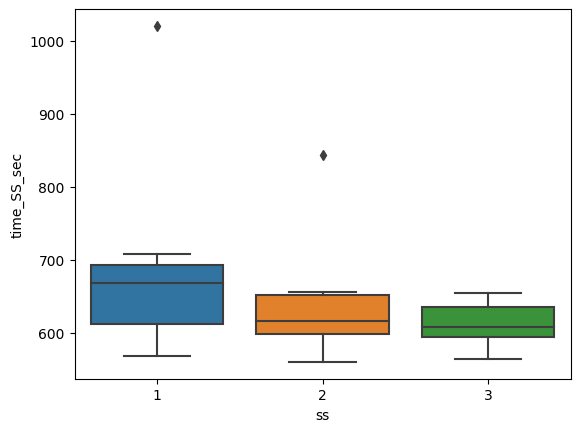

In [32]:
bplt=sns.boxplot( y=ss_times_C6["time_SS_sec"], x=ss_times_C6["ss"])

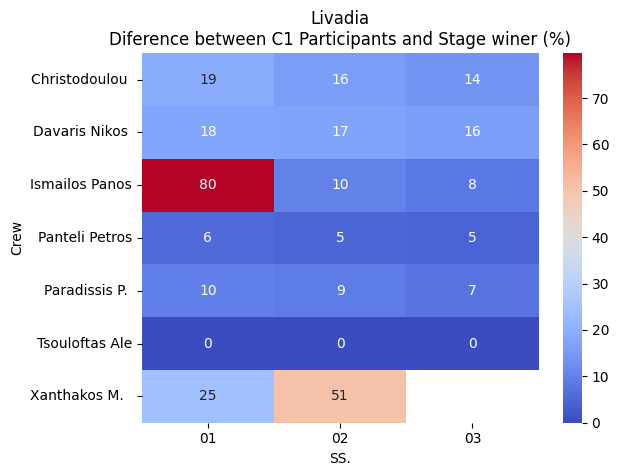

In [33]:
ss_timesa = pd.pivot_table(ss_times_C6, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between C1 Participants and Stage winer (%)')
plt.savefig(rallyname + "C1.jpg")